In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Описание

Заказчик - страховая компания, которая предоставила своим клиентам медицинское страхование, и теперь они хотели бы получить модель, чтобы предсказать, будут ли клиенты прошлого года также заинтересованы в страховании транспортных средств, предоставляемом компанией.

### Данные
<ul>
    <li><b>id</b> - Уникальный ID клиента.</li>
    <li><b>Gender</b> - Пол клиента.</li>
    <li><b>Age</b> - Возраст клиента.</li>
    <li><b>DrivingLicense</b> - 0: Клиент не имеет водетельской лицензии, 1: у клиента есть воводительская лицензия.</li>
    <li><b>RegionCode</b> - Уникальный код региона клиента.</li>
    <li><b>Previously_Insured</b> - 1: У клиента уже есть страхование автомоболя, 0: у клиента нет страховки автомобиля.</li>
    <li><b>VehicleAge</b> - Возраст автомобиля.</li> 
    <li><b>VehicleDamage</b> - 1: Транспортное средство клиента попадало в аварии ранее, 0: Транспортное средство клиента не было повреждено ранее</li>
    <li><b>AnnualPremium</b> - Сумма, которую клиент должен заплатить за год.</li>
    <li><b>PolicySalesChannel</b> - Анонимный код для канала связи с клиентов, т.е различные агенты, по почте, по телефону, лично и т.д.</li> 
    <li><b>Vintage</b> - Количество дней, в течение которых клиент был связан с компанией.</li> 
    <li><b>Response</b> - 1: Клиент заинтересован, 0: Клиент не заинтересован.</li> 
</ul>

### Зачада

Построить модель, предсказывающую будет ли клиент заинтересован с использовании услуги в дальнейшем. 

Считывание исходных данных. <b>train.csv</b> - содержит данные для тренировки модели. <b>test.csv</b> - данные для тестирования модели. <b>sample_submission_iA3afxn.csv</b> - файл с ответами клиентов.

In [56]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission_iA3afxn.csv")

Распечатаем информацию о первых пяти клиентах.

In [60]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Выведем информацию о таблицах (имена столбцов, количество ненулевых элементов в каждом  из них, типы элементов в столбцах и т.д). Так же дополнительно проверим наличие повторяющихся строк или строк с пропущенными значениями.

In [61]:
train.info()
test.info()

for df, df_names in (train, 'train'), (test, 'test'):
    print("\n\nThere is {} duplicated values in '{}' data frame".format(df.duplicated().sum(), df_names))
    print("There is {} missing values in '{}' data frame".format(df.isnull().sum().sum(), df_names))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 

Визуализация и описательная статистика - важные этапы анализа данных. Сводную информацию о признаках можем получить, вызвав метод *describe*.
Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квантилей.
По умолчанию этот метод дает информацию только о количественных признаках.

In [62]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [63]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


По характеристикам выше можно заметить, что тестовая выборка отражает аналогичные тенденции тренировочной, поэтому изначальное разбиение на них является удовлетворительным и его изменение не требуется.
Прежде чем выполнять графическую отрисовку данных выполним преобразование строчных элементов к числовым. К примеру, мы имеем 2 столбца (Gender, Vehicle_Damage) с булевыми значениями. Заменим эти значениями с помощью 0 и 1. 

In [64]:
print('train[Gender]: ', train['Gender'].unique(), '\ntest[Gender]: ', test['Gender'].unique())
print('train[Vehicle_Damage]: ', train['Vehicle_Damage'].unique(), '\ntest[Vehicle_Damage]: ', test['Vehicle_Damage'].unique())

train[Gender]:  ['Male' 'Female'] 
test[Gender]:  ['Male' 'Female']
train[Vehicle_Damage]:  ['Yes' 'No'] 
test[Vehicle_Damage]:  ['No' 'Yes']


In [65]:
train = train.replace(['Female', 'Male', 'No', 'Yes'], [0, 1, 1, 0])
test = test.replace(['Female', 'Male', 'No', 'Yes'], [0, 1, 1, 0])
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,0,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,1,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,0,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,1,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,1,27496.0,152.0,39,0


Столбец *Vehicle_Age* содержит всего 3 уникальных значения. Заменим их на 0,1,2.

In [66]:
print('train[Vehicle_Age]: ', train['Vehicle_Age'].unique())

train[Vehicle_Age]:  ['> 2 Years' '1-2 Year' '< 1 Year']


In [67]:
train = train.replace(['< 1 Year', '1-2 Year', '> 2 Years'], [0, 1, 2])
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,0,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,1,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,0,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,1,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,1,27496.0,152.0,39,0


Продемонстрируем несбалансированность классов задачи:

0 - 0.91%
1 - 0.09%


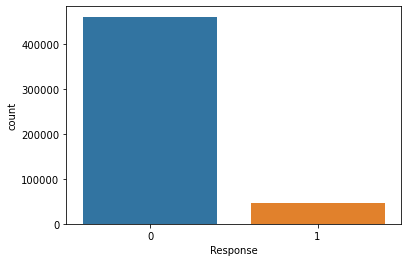

In [109]:
sns.countplot(x=pd.concat([train['Response'], sample['Response']]))
value_counts = (pd.concat([train['Response'], sample['Response']])).value_counts()

total_values = value_counts.values[0] + value_counts.values[1]

print('0 - {:.2f}%'.format(value_counts.values[0] / total_values))
print('1 - {:.2f}%'.format(value_counts.values[1] / total_values))

Дополнительно проанализируем данные *Previously_Insured*,

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

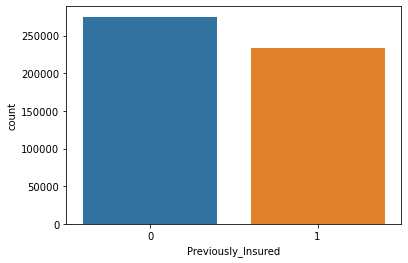

In [117]:
sns.countplot(x=pd.concat([train['Previously_Insured'], test['Previously_Insured']]))
#sns.countplot(x=test['Previously_Insured'])``

1    507097
0      1049
Name: Driving_License, dtype: int64
Кол-во клиентов имеющих водительскую лицензию - 507097.00
Кол-во клиентов не имеющих водительскую лицензию - 1049.00


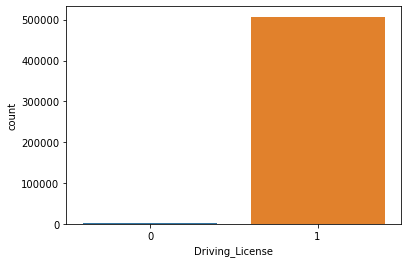

In [144]:
sns.countplot(x=pd.concat([train['Driving_License'], test['Driving_License']]))
value_counts = (pd.concat([train['Driving_License'], test['Driving_License']])).value_counts()
print(value_counts)

print('Кол-во клиентов имеющих водительскую лицензию - {:.2f}'.format(value_counts.values[0]))
print('Кол-во клиентов не имеющих водительскую лицензию - {:.2f}'.format(value_counts.values[1]))

In [167]:
print(train.loc[:, ['Driving_License', 'Response']][train['Driving_License'] == 0].value_counts())
print(pd.concat([test, sample.loc[:, ['Response']]], axis=1).loc[:, ['Driving_License', 'Response']][test['Driving_License'] == 0].value_counts())

Driving_License  Response
0                0           771
                 1            41
dtype: int64
Driving_License  Response
0                0           237
dtype: int64


Из примера выше можно сделать вывод, что значительное большинство людей, не имеющих водительскую лицензию, отказываются от услуги страхования автомобиля.

In [176]:
sns.countplot(pd.concat([train.loc[:, ['Response']], sample.loc[:, ['Response']]]), hue=pd.concat([train.loc[:, ['Vehicle_Damage']], test.loc[:,['Vehicle_Damage']]));

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-176-81a77786ede5>, line 1)

In [173]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(train.shape[0]), size=1000, replace=False)

Отрисовка всех точек требует много времени. Тем более, точки накладываются друг на друга и сложно понять сколько точек на том или ином участке графика (особенно, если не использовать параметр alpha). Поэтому изобразим только  1000  случайных точек:

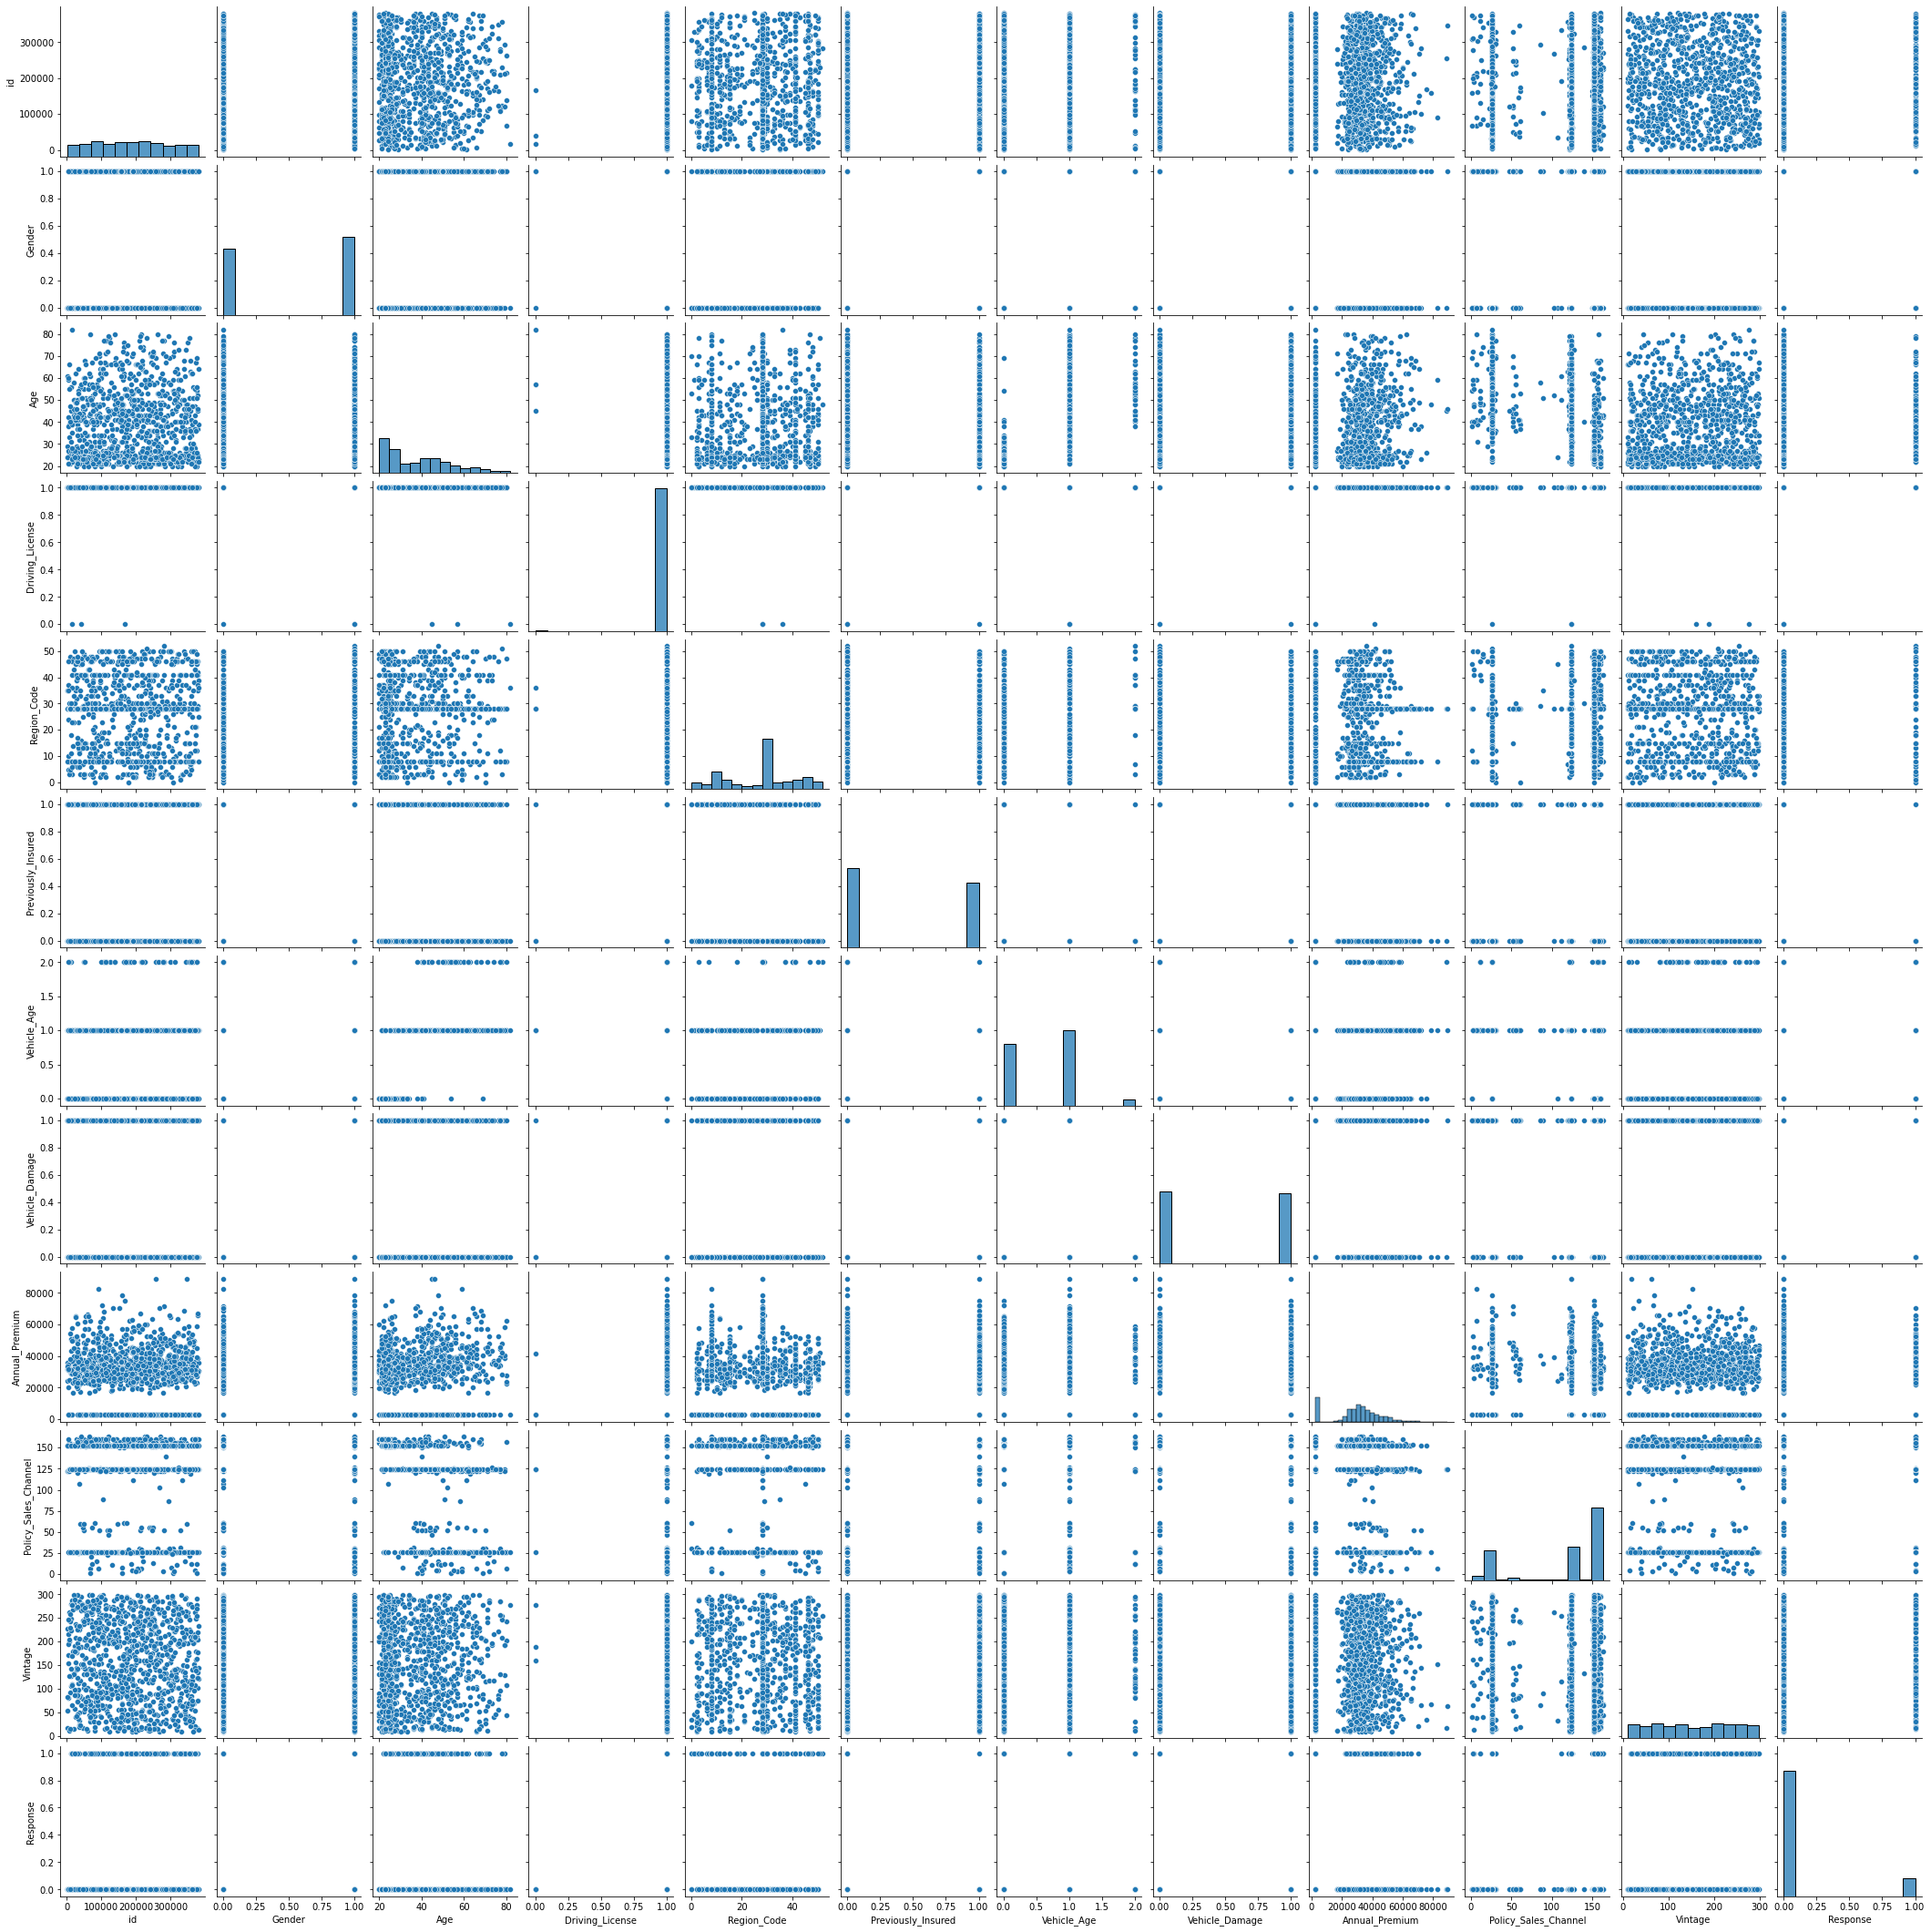

In [72]:
sns.pairplot(train.iloc[random_subset], diag_kind='hist')

По данным графикам нельзя уверенно сказать что нет никаких зависимостей между признаками. Бинарные признаки не инфомативны на них, поэтому воспользуемся корреляционной матрницей.